# Name: Shivani S
## #Task 6
# Prediction using Decision Tree Algorithm
Q. Create the Decision Tree classifier and visualize it graphically on the Iris dataset. The purpose is, if we feed any new data to this classifier, it should be able to predict the right class accordingly.

In [121]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [122]:
data_iris = pd.read_csv('Iris.csv')

In [123]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [124]:
data_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [125]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [126]:
data_iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

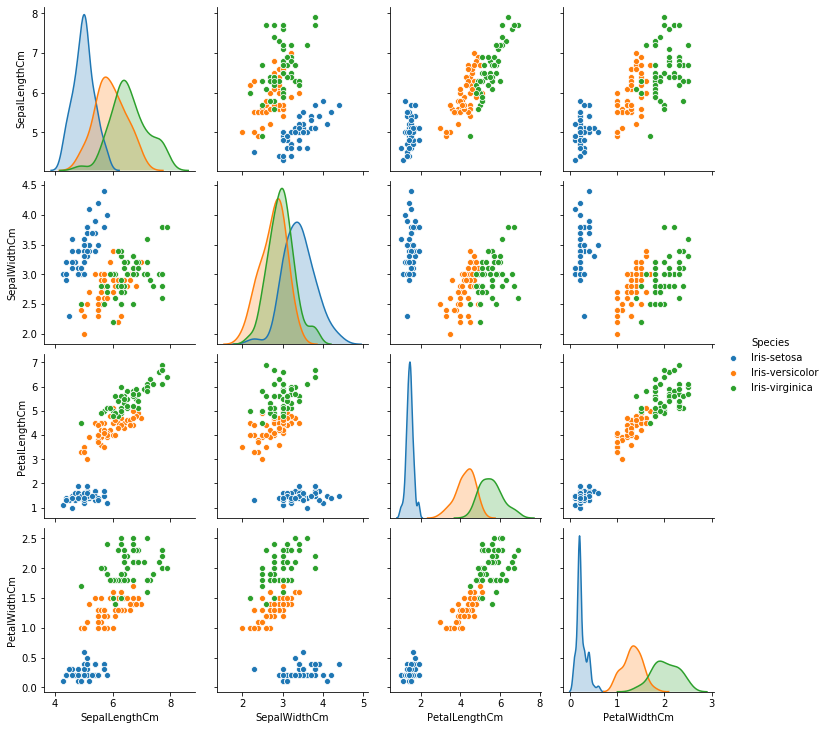

In [127]:
sns.pairplot(data_iris.iloc[:, 1:], hue="Species")

<b>It is clearly visible that, Iris setosa forms a separate cluster, whereas the other two species, Iris-versicolor and Iris-virginica are inseparable clusters.
<br> Also, the data is normally distributed with little screwness!</b>

In [128]:
cor = data.corr()
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Bivariate Analysis

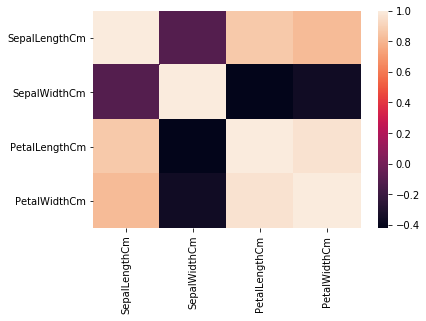

In [129]:
plt.figure()
sns.heatmap(cor)

There is strong positive and negative correlation between all the variables.  

In [130]:
# Removing the unwanted columns from the data

data = data_iris.iloc[:,1:5]

In [131]:
target = data_iris['Species']

### Splitting the data

In [132]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data,target, random_state = 101)

In [133]:
# Without using stratify parameter

train_y.value_counts()/len(train_y)

Iris-setosa        0.357143
Iris-virginica     0.348214
Iris-versicolor    0.294643
Name: Species, dtype: float64

In [134]:
test_y.value_counts()/len(test_y)

Iris-versicolor    0.447368
Iris-virginica     0.289474
Iris-setosa        0.263158
Name: Species, dtype: float64

### Training the model
### a) Gini index as ASM(Attribute Selection Measure)

In [135]:
clf = DecisionTreeClassifier()

In [136]:
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualization

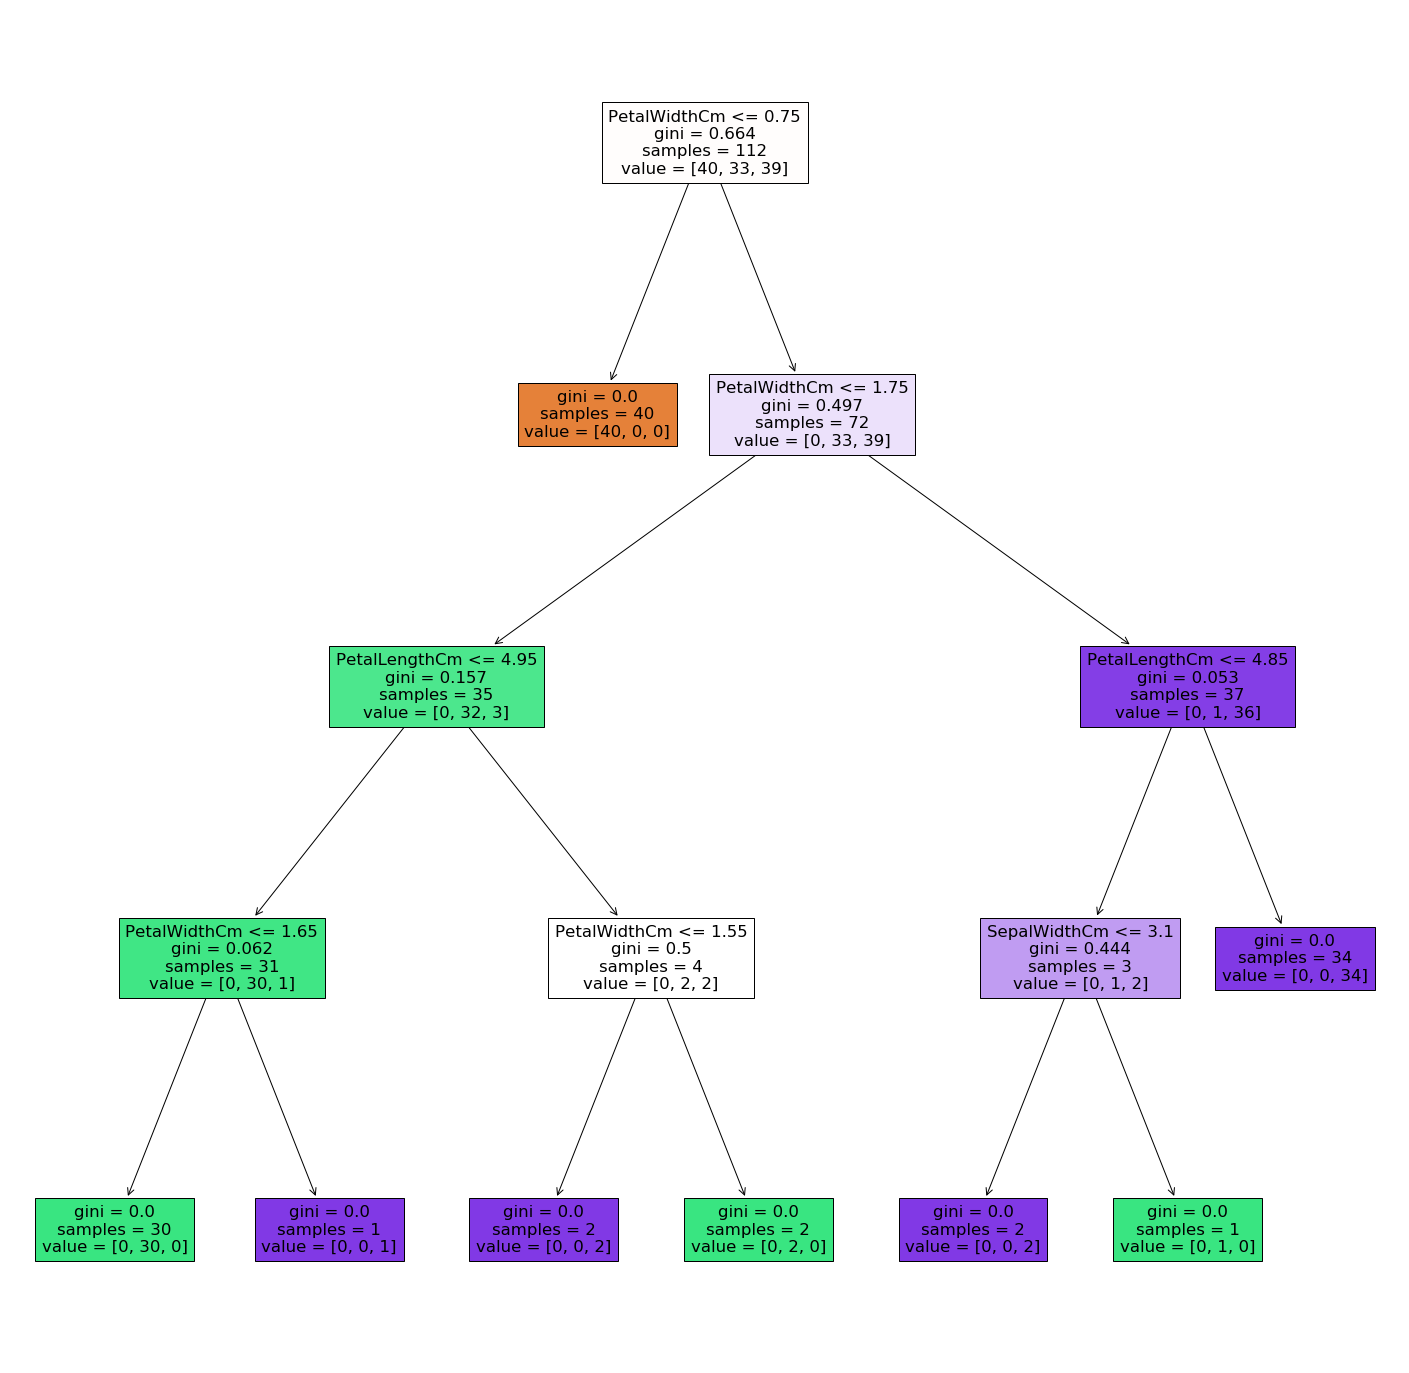

In [137]:
c = list(data.columns)

plt.figure(figsize=(25,25))
plot_tree(clf, feature_names = c, filled = True)
plt.show()

In [147]:
predicted_y = clf.predict(test_x)
predicted_y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

### Evaluation Metrics

In [139]:
import sklearn.metrics as sm

In [140]:
sm.accuracy_score(test_y, predicted_y)

0.9736842105263158

In [141]:
sm.confusion_matrix(test_y, predicted_y)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

<b>Therefore the model has accuracy of 97%!</b>
### b) Entropy as ASM
### Training the model

In [142]:
clf2 = DecisionTreeClassifier(criterion = 'entropy')

In [143]:
clf2.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

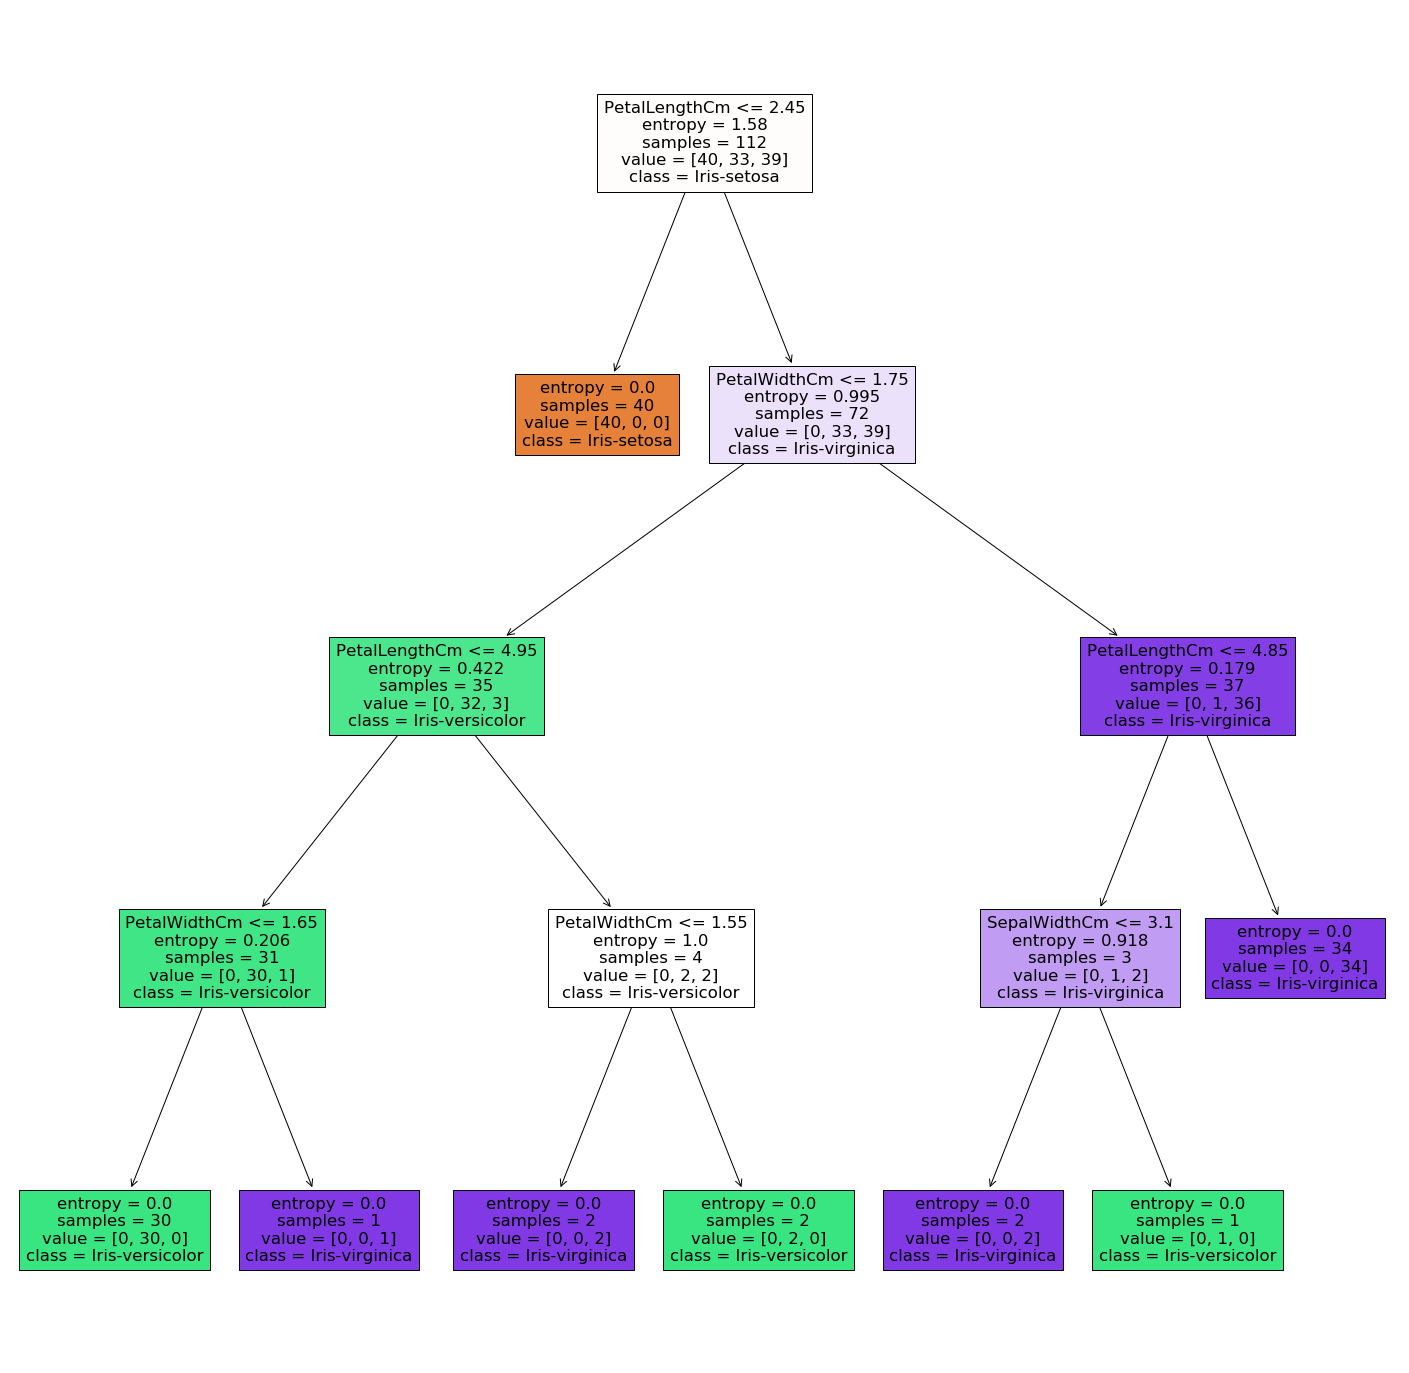

In [144]:
c = list(data.columns)
t = data_iris['Species'].unique()

plt.figure(figsize=(25,25))
plot_tree(clf2, feature_names = c, class_names = t, filled = True)
plt.show()

### Evaluation Metrics

In [148]:
p2_y = clf2.predict(test_x)
p2_y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [149]:
sm.confusion_matrix(test_y, p2_y)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

In [146]:
sm.accuracy_score(test_y, p2_y)

0.9736842105263158

<b> Therefore the model is 97% accurate! This is way higher that the accuracy we got while using the KMeans Clustering algorithm.</b>